In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Convolution - Intutively


In [2]:
url = "https://source.unsplash.com/U66avewmxJk/400x300"

In [3]:
cheetah = imageio.imread(url)

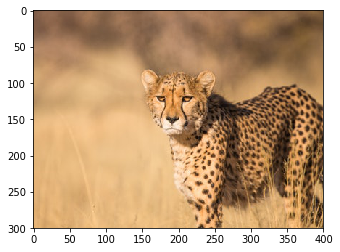

In [4]:
plt.imshow(cheetah)

In [5]:
cheetah.shape

(300, 400, 3)

In [6]:
import skimage

In [7]:
image_gray = skimage.color.rgb2gray(cheetah)

In [8]:
image_gray.shape

(300, 400)

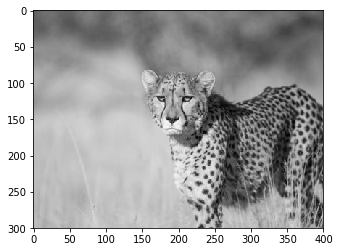

In [9]:
plt.imshow(image_gray, cmap="gray")

In [10]:
image = image_gray.reshape(300, 400, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation

Using TensorFlow backend.


In [12]:
filters=1
kernel_size = (2,2)

In [13]:
model = Sequential()
model.add(Conv2D(filters, kernel_size, input_shape=(300,400,1)))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 399, 1)       5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [15]:
def convolution(image, model):
    print("Original Shape:", image.shape)
    image = image/255
    image_batch = np.array([image])
    conv_image = model.predict(image_batch)
    conv_image = conv_image.squeeze()
    print("New Shape:", conv_image.shape)
    plt.imshow(conv_image, cmap="gray")

Original Shape: (300, 400, 1)
New Shape: (299, 399)


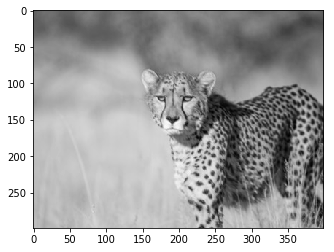

In [16]:
convolution(image,model)

In [17]:
model.layers[0].get_weights()

[array([[[[0.3465659 ]],
 
         [[0.14322966]]],
 
 
        [[[0.009628  ]],
 
         [[0.7061048 ]]]], dtype=float32), array([0.], dtype=float32)]


# convo+activation

In [18]:
model2 = Sequential()
model2.add(Conv2D(1,(3,3),input_shape=(300,400,1)))
model2.add(Activation("relu"))

Original Shape: (300, 400, 1)
New Shape: (298, 398)


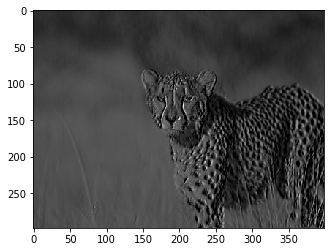

In [19]:
convolution(image, model2)

# convo+pooling

In [20]:
model3 = Sequential()
model3.add(Conv2D(1,(8,8), input_shape=(300, 400, 1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

Original Shape: (300, 400, 1)
New Shape: (146, 196)


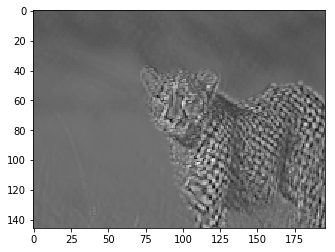

In [21]:
convolution(image, model3)

# Conv + activation + pooling

In [22]:
model4 = Sequential()
model4.add(Conv2D(1,(8,8), input_shape=(300,400,1)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))

Original Shape: (300, 400, 1)
New Shape: (146, 196)


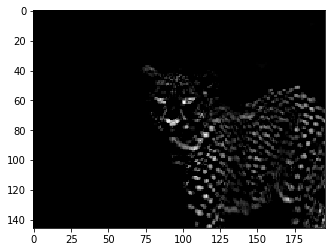

In [23]:
convolution(image, model4)